# Time Resampling

In [25]:
import pandas as pd
from datetime import datetime

In [9]:
df = pd.read_csv("Data/starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [10]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [14]:
# Daily data to yearly data
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [15]:
# Daily to weekly
df.resample(rule='W').mean()

,Close,Volume
Date,,
2015-01-04,38.006100,6906098.0
2015-01-11,37.573980,13949588.8
2015-01-18,37.493720,9499875.2
2015-01-25,38.906225,20900684.0
2015-02-01,41.123980,11920780.0
...,...,...
2018-12-09,66.542500,13917364.0
2018-12-16,65.958000,12203624.4
2018-12-23,63.398000,16769296.4


In [16]:
# Daily data to yearly data
df.resample(rule='A').min()

,Close,Volume
Date,,
2015-12-31,36.9748,2215418
2016-12-31,49.4458,3228848
2017-12-31,51.2345,3479177
2018-12-31,47.9470,4843941


In [17]:
# Daily data to yearly data
df.resample(rule='A').max()

,Close,Volume
Date,,
2015-12-31,59.8475,38107194
2016-12-31,58.0465,32820193
2017-12-31,62.4924,53454789
2018-12-31,68.3530,62091071


In [18]:
# Daily data to yearly data
df.resample(rule='A').std()

,Close,Volume
Date,,
2015-12-31,6.076922,4.093368e+06
2016-12-31,1.958114,3.936798e+06
2017-12-31,2.415526,4.690972e+06
2018-12-31,4.678178,6.465358e+06


In [20]:
def first_day(entry):
    if len(entry) != 0:
        return entry[0]

In [21]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [22]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:title={'center':'Yearly Mean Closing Price'}, xlabel='Date'>

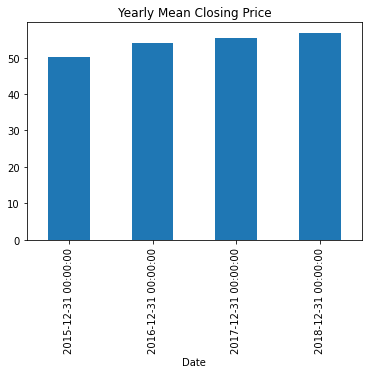

In [30]:
df['Close'].resample('A').mean().plot.bar(title="Yearly Mean Closing Price")

### If we want to resample the max closing price monthly

<AxesSubplot:title={'center':'Monthly Max Closing Price'}, xlabel='Date'>

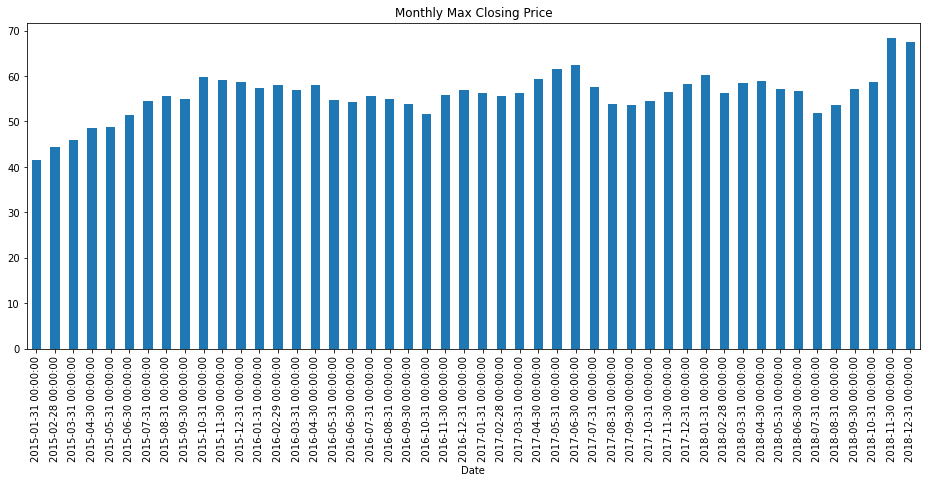

In [32]:
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title="Monthly Max Closing Price")

# Time Shifting

In [33]:
import pandas as pd

In [35]:
df = pd.read_csv("Data/starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [36]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [40]:
# We can shift the rows by 1 sample
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [41]:
# We can shift backwards by 1
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [45]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [46]:
# We can shift everything over by 1 month
# So everything shifts to the end of the month if you focus on the date index 
df.shift(periods=1, freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


# Rolling and Exapanding

In [49]:
import pandas as pd

In [51]:
df = pd.read_csv("Data/starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:title={'center':'Close Prices'}, xlabel='Date'>

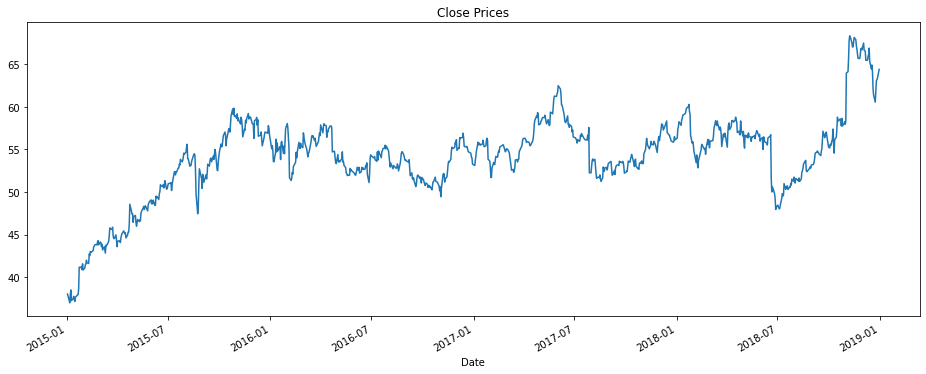

In [53]:
df['Close'].plot(figsize=(16,6), title="Close Prices")

### Let's create a roliing mean

In [56]:
# It is a day based data. Daily
# If we want to look at the 7 day rolling window
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


<AxesSubplot:xlabel='Date'>

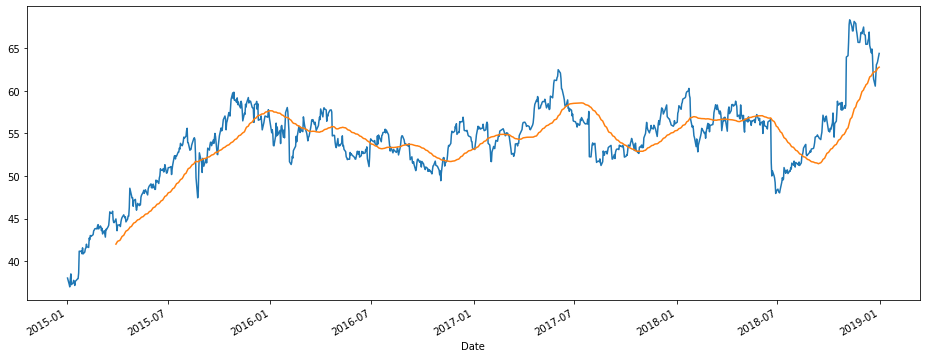

In [60]:
df['Close'].plot(figsize=(16,6))
df.rolling(window=60).mean()['Close'].plot()

In [61]:
df["Close: 30 Day Mean"] = df['Close'].rolling(window=30).mean()

In [62]:
df

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
...,...,...,...
2018-12-24,60.5600,6323252,65.963703
2018-12-26,63.0800,16646238,65.791913
2018-12-27,63.2000,11308081,65.647000


<AxesSubplot:xlabel='Date'>

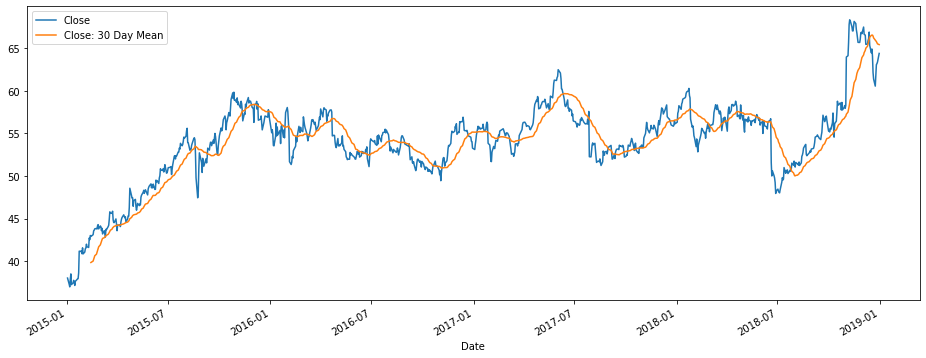

In [63]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

## Expanding

<AxesSubplot:xlabel='Date'>

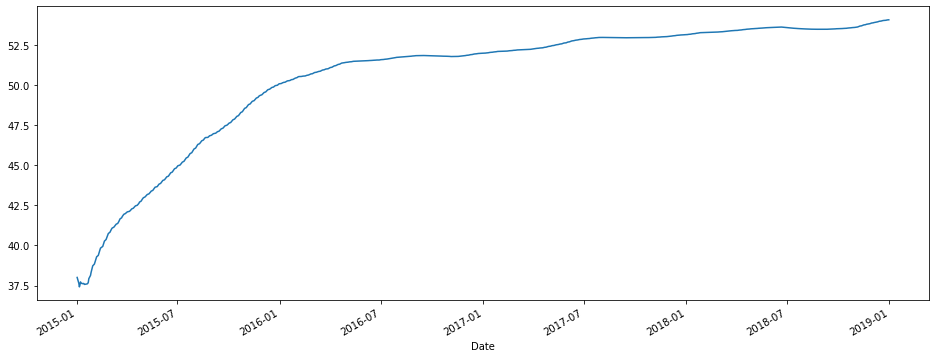

In [67]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))